<a href="https://colab.research.google.com/github/nairsatish/4540/blob/master/AND_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://brilliant.org/wiki/backpropagation/

Absolutely simplest back propagation example (version 2) https://www.youtube.com/watch?v=8d6jf7s6_Qs

A worked example with more neurons - https://www.youtube.com/watch?v=n2L1J5JYgUk

EXAMPLE OF AN AND NETWORK - 2 inputs in layer 1 and 1 neuron in the output layer
See "Helpful Tips" at the end of the notebook

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(2)

DATA (input and output for this supervised learning problem)

In [32]:
X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
Y = torch.Tensor([0,0,0,1]).view(-1,1)

HYPOTHESIS/MODEL

In [33]:
class AND(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        # Initialize attributes and methods of the parent class nn.Module
        super(AND, self).__init__()
        
        # Initialize layers
        self.lin1 = nn.Linear(input_dim, output_dim)
        #self.lin2 = nn.Linear(2, output_dim)
    
    # Each custom torch class (inherited from nn.Module) has to have a forward() method
    def forward(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        #x = self.lin2(x)
        return x

In [34]:
model = AND()

In [35]:
def weights_init(model):
    print(list(model.modules())) # network from above printed out
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)
            m.bias.data.normal_(0, 1)

weights_init(model) # may not be needed but used to show the idea

[AND(
  (lin1): Linear(in_features=2, out_features=1, bias=True)
), Linear(in_features=2, out_features=1, bias=True)]


COST or LOSS FUNCTION

In [36]:
loss_func = nn.MSELoss()

UPDATE RULE

In [37]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.0) # Another popular optimizer is ADAM

SETTING IT ALL UP

In [38]:
#print initial weights before start of training
print(f"initial lin1.weight: {model.lin1.weight}")
print(f"initial lin1.bias: {model.lin1.bias}")
print("--------------------")
print("\n")

epochs = 2001
steps = X.size(0)
for i in range(epochs):
    
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        
        optimizer.zero_grad()
        y_hat = model(X[data_point])
        loss = loss_func.forward(y_hat, Y[data_point]) # loss_func(y_hat, Y[data_point]) also works
        
        loss.backward() 
        optimizer.step()

        if i == 0:
            if j == 0:
                print("First epoch gradients:\n--------------------\n")
            print(f">> data_point {data_point}:")
            print(f">> Step {j}:")
            print(f"grad(lin1.weight): {model.lin1.weight.grad}")
            print(f"grad(lin1.bias): {model.lin1.bias.grad}")
            # these gradients are used to calculate the updated weights and bias
            print(f"lin1.weight: {model.lin1.weight}")
            print(f"lin1.bias: {model.lin1.bias}")
            print("\n")

            if j == steps - 1:
                print("\nLoss History:")
                print("--------------------")
        
    if i % 500 == 0:
         print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

initial lin1.weight: Parameter containing:
tensor([[ 0.6985, -2.3659]], requires_grad=True)
initial lin1.bias: Parameter containing:
tensor([0.1122], requires_grad=True)
--------------------


First epoch gradients:
--------------------

>> data_point 1:
>> Step 0:
grad(lin1.weight): tensor([[0.0000, 0.0163]])
grad(lin1.bias): tensor([0.0163])
lin1.weight: Parameter containing:
tensor([[ 0.6985, -2.3662]], requires_grad=True)
lin1.bias: Parameter containing:
tensor([0.1119], requires_grad=True)


>> data_point 2:
>> Step 1:
grad(lin1.weight): tensor([[0.2950, 0.0000]])
grad(lin1.bias): tensor([0.2950])
lin1.weight: Parameter containing:
tensor([[ 0.6926, -2.3662]], requires_grad=True)
lin1.bias: Parameter containing:
tensor([0.1060], requires_grad=True)


>> data_point 0:
>> Step 2:
grad(lin1.weight): tensor([[0., 0.]])
grad(lin1.bias): tensor([0.2625])
lin1.weight: Parameter containing:
tensor([[ 0.6926, -2.3662]], requires_grad=True)
lin1.bias: Parameter containing:
tensor([0.1007], 

In [39]:
model_params = list(model.named_parameters())
print(model_params)
model_params = list(model.parameters()) # used to make below cell better

[('lin1.weight', Parameter containing:
tensor([[2.0268, 1.9818]], requires_grad=True)), ('lin1.bias', Parameter containing:
tensor([-3.1448], requires_grad=True))]


USING THE INFO ABOVE, CAN YOU GET THE EQUATIONS OF THE LINES PLOTTED BELOW?

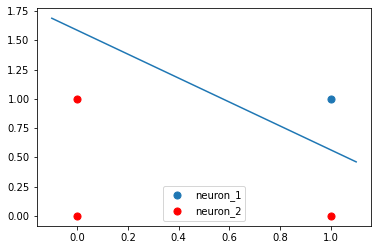

In [40]:
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[3, 0], X.numpy()[3, 1], s=50)
plt.scatter(X.numpy()[[0, 1,2], 0], X.numpy()[[0, 1, 2], 1], c='red', s=50)

# weights(0,0) and (0,1) are from in the (TO,FROM) format, 
# i.e., to neuron 0(or 1) from input 0(or 1). See Helpful Hints at the end
x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()

ADDITIONAL EXERCISES - (i) Now try to use momentum=0.9 instead of 0 that we have presently, to study how that hyperparameter works; (ii) extend this code to solve the XOR problem

Documentation - pytorch.org

HELPFUL TIPS


```
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x[1][2])
>>> tensor(6)
```

```
x[0][1] = 8
print(x)
>>> tensor([[ 1,  8,  3],
            [ 4,  5,  6]])
```